Here we are going to use 4 machine learning techniques for classification.
- Decision Tree
- Random Forest
- Support vector machine(SVM)
- Naive Bayes
- Logistic Regression



In [242]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the data
dataset = pd.read_csv('dataset1.csv')
dataset.head()

,Links_in_tags,Abnormal_URL,Submitting_to_email,SFH,Iframe,popUpWidnow,on_mouseover,RightClick,Redirect,Result
0,0,-1,1,1,-1,1,1,1,-1,1
1,1,-1,1,1,-1,1,1,1,-1,1
2,1,-1,1,1,-1,1,1,1,0,1
3,-1,-1,1,-1,1,-1,-1,-1,-1,-1
4,0,-1,1,-1,1,-1,-1,-1,-1,-1


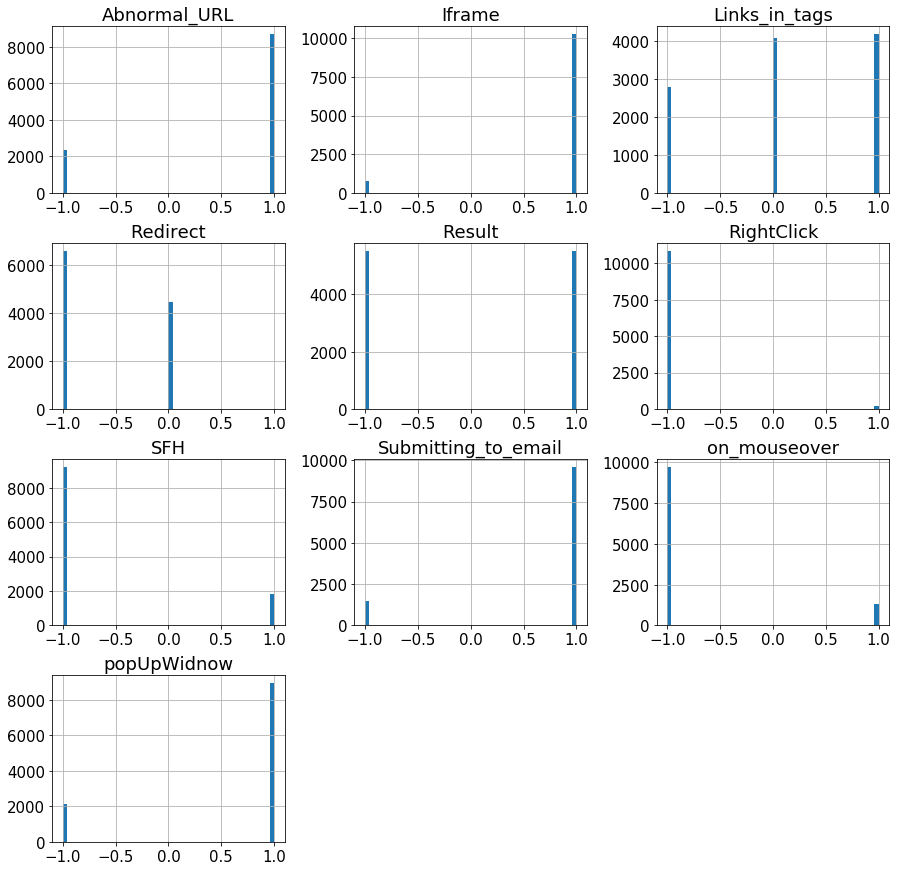

In [243]:
#For visualization - Plotting the data distribution
dataset.hist(bins = 50,figsize = (15,15))
plt.show()

In [244]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X= dataset.drop(columns='Result')
Y = dataset['Result']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # this is for the cross validation

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape


((8843, 9), (2211, 9))

In [245]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import numpy as np
from matplotlib.pyplot import figure
from statistics import mean

In [246]:
#function for ploting confusion matrix
def conf_matrix(clf_predict_result):
    plt.rcParams["font.size"] = "15"
    plt.rcParams["figure.figsize"] = (10,5)
    data = confusion_matrix(Y_test,clf_predict_result) #y_test - actual data ##dtree_predict - predicted y
    labels = ['legitimate','phishing']
    cmap=sns.light_palette("blue")
    sns.heatmap(data, annot=True, cmap=cmap, fmt=".4f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title("Confusion matrix")
    plt.show()


In [247]:
#function for k fold cross validation
def kfold_cross_validation(model):
    kf = StratifiedKFold(n_splits=5, random_state=np.random.seed(1))

    train_accuracy = []
    test_accuracy = []

    for train_index, test_index in kf.split(X, Y):  
        X_train_new, X_test_new = X_scaled[train_index], X_scaled[test_index]    
        y_train_new, y_test_new = Y[train_index], Y[test_index]

        model.fit(X_train_new, y_train_new)

        #train accuracy
        conf_matrix = confusion_matrix(y_train_new, model.predict(X_train_new))
        tn, fp, fn, tp = conf_matrix.ravel()
        train_accuracy.append( (tp + tn) / (tp+tn+fp+fn) )

        #test accuracy
        conf_matrix = confusion_matrix(y_test_new, model.predict(X_test_new))
        tn, fp, fn, tp = conf_matrix.ravel()
        test_accuracy.append( (tp + tn) / (tp+tn+fp+fn) )

    print('mean test accuracy : '+str(mean(test_accuracy)))
    print('max test accuracy : '+str(max(test_accuracy))+'\n')


    for a in range(5):
        print(str(a+1)+' -- Train accuracy: '+str(train_accuracy[a])+' -- Test accuracy: '+str(test_accuracy[a]))
        
    return train_accuracy,test_accuracy


In [248]:
#function for ploting kfold graph
def kfold_graph(tr_accuracy,ts_accuracy,clf_name): 
    plt.rcParams["font.size"] = "10"
    fig = figure(num=None, figsize=(8, 4), dpi=100, facecolor='w',edgecolor='k')
    plt.ylim(0.2, 1.1)
    plt.xticks(range(5), ['1', '2', '3', '4', '5'])

    plt.plot(tr_accuracy)
    plt.plot(ts_accuracy)

    plt.title('5-Fold Train and Test Accuracies of '+clf_name+' classifier ')
    plt.ylabel('Accuracy')
    plt.xlabel('Fold')
    plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
    plt.show()

### 1 - Lets carry out classification for all the features

##### 1.1 - Decision Tree Classifier

In [249]:
from sklearn.tree import DecisionTreeClassifier

d_tree=DecisionTreeClassifier()
model_1=d_tree.fit(X_train,Y_train)

dtree_predict=model_1.predict(X_test)
accuracy_score(dtree_predict,Y_test)

0.8543645409317051

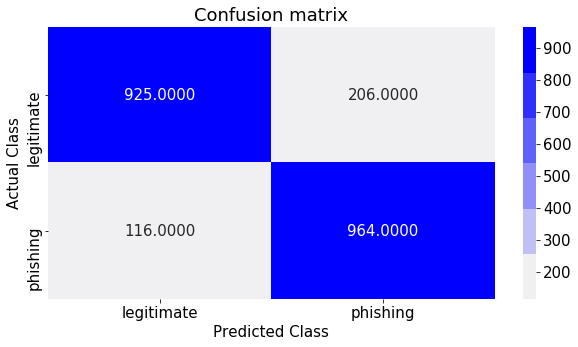

In [250]:
#confusion matrix
conf_matrix(dtree_predict)

In [251]:
#kfold cross validation
tr_accuracy_1, ts_accuracy_1 = kfold_cross_validation(model_1)
mean_accuracy_1 = mean(ts_accuracy_1)

mean test accuracy : 0.7707658335226377
max test accuracy : 0.9045680687471732

1 -- Train accuracy: 0.832409815673414 -- Test accuracy: 0.9045680687471732
2 -- Train accuracy: 0.8654302838403257 -- Test accuracy: 0.772501130710086
3 -- Train accuracy: 0.8766255795544499 -- Test accuracy: 0.5653550429669832
4 -- Train accuracy: 0.8322967318783219 -- Test accuracy: 0.7951153324287653
5 -- Train accuracy: 0.8544776119402985 -- Test accuracy: 0.816289592760181


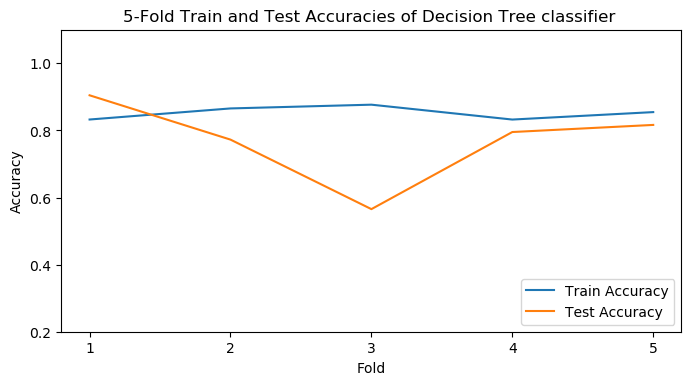

In [252]:
#plot graph for cross validation accuracies
kfold_graph(tr_accuracy_1,ts_accuracy_1,"Decision Tree")

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


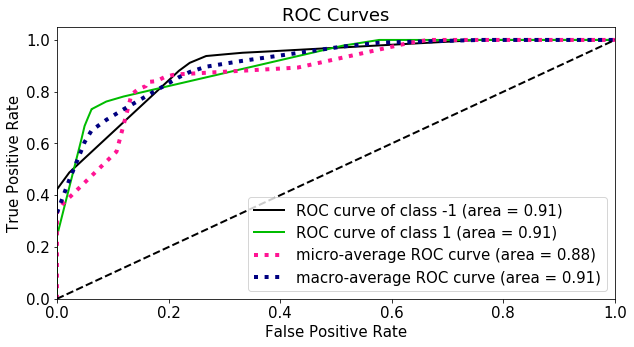

In [253]:
# ROC curve
import scikitplot.plotters as skplt

plt.rcParams["font.size"] = "15"
plt.rcParams["figure.figsize"] = (10,5)

skplt.plot_roc_curve(Y_test, model_1.predict_proba(X_test))
plt.show()

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_precision_recall_curve instead.
  warnings.warn(msg, category=FutureWarning)


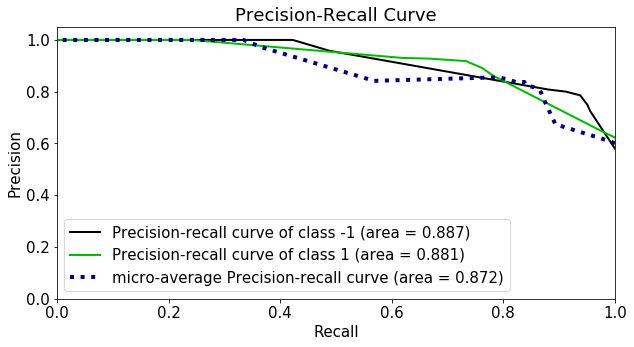

In [254]:
# precision recall curve
skplt.plot_precision_recall_curve(Y_test, model_1.predict_proba(X_test))
plt.show()

##### 1.2 - Random Forest Classifier

In [255]:
from sklearn.ensemble import RandomForestClassifier

rfc=DecisionTreeClassifier()
model_2=rfc.fit(X_train,Y_train)

rfc_predict=model_2.predict(X_test)
accuracy_score(rfc_predict,Y_test)

0.8543645409317051

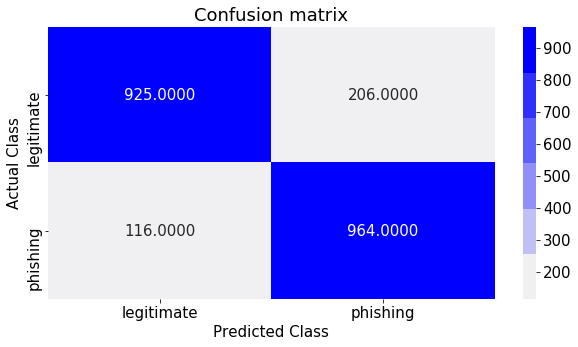

In [256]:
#Confusion matrix
conf_matrix(rfc_predict)

In [257]:
#kfold cross validation
tr_accuracy_2, ts_accuracy_2 = kfold_cross_validation(model_2)

#get the mean value of test accuracy
mean_accuracy_2 = mean(ts_accuracy_2)

mean test accuracy : 0.7707658335226377
max test accuracy : 0.9045680687471732

1 -- Train accuracy: 0.832409815673414 -- Test accuracy: 0.9045680687471732
2 -- Train accuracy: 0.8654302838403257 -- Test accuracy: 0.772501130710086
3 -- Train accuracy: 0.8766255795544499 -- Test accuracy: 0.5653550429669832
4 -- Train accuracy: 0.8322967318783219 -- Test accuracy: 0.7951153324287653
5 -- Train accuracy: 0.8544776119402985 -- Test accuracy: 0.816289592760181


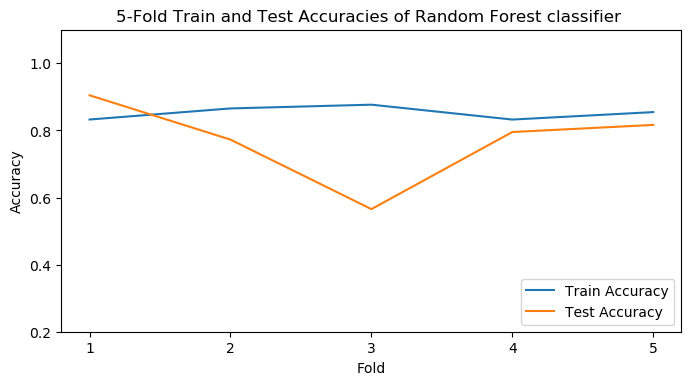

In [192]:
#plot graph for cross validation accuracies
kfold_graph(tr_accuracy_2,ts_accuracy_2,"Random Forest")

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


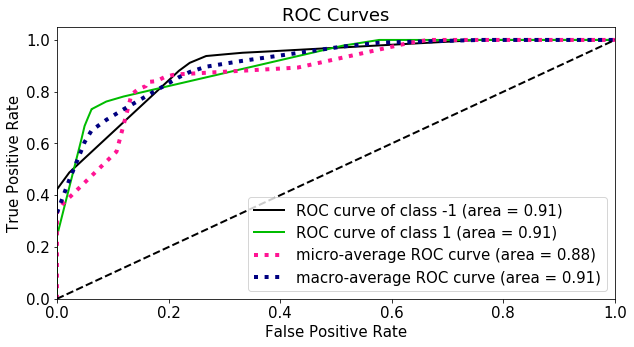

In [197]:
# ROC curve
import scikitplot.plotters as skplt

plt.rcParams["font.size"] = "15"
plt.rcParams["figure.figsize"] = (10,5)

skplt.plot_roc_curve(Y_test, model_2.predict_proba(X_test))
plt.show()

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_precision_recall_curve instead.
  warnings.warn(msg, category=FutureWarning)


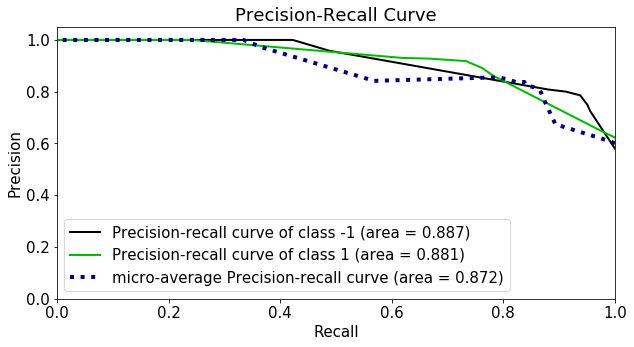

In [198]:
# precision recall curve
skplt.plot_precision_recall_curve(Y_test, model_2.predict_proba(X_test))
plt.show()

##### 1.3 - Support vector machine(SVM)

In [211]:
from sklearn.svm import SVC
svc = SVC(probability=True)
model_3=svc.fit(X_train,Y_train)

svc_predict=model_3.predict(X_test)
accuracy_score(svc_predict,Y_test)

0.8435097241067391

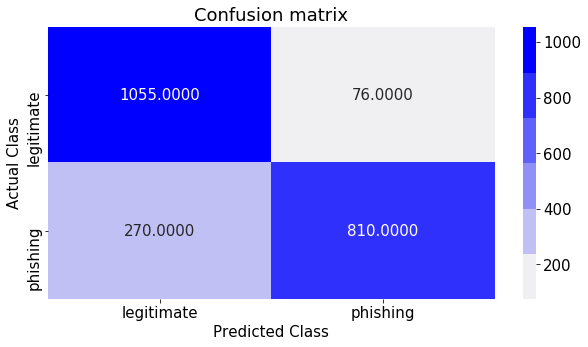

In [212]:
#Confusion matrix
conf_matrix(svc_predict)

In [213]:
#kfold cross validation accuracies
tr_accuracy_3, ts_accuracy_3 = kfold_cross_validation(model_3)
#get the mean value of test accuracy
mean_accuracy_3 = mean(ts_accuracy_3)

mean test accuracy : 0.7607250460981805
max test accuracy : 0.9072817729534147

1 -- Train accuracy: 0.824833201402239 -- Test accuracy: 0.9072817729534147
2 -- Train accuracy: 0.8620377699875608 -- Test accuracy: 0.7209407507914971
3 -- Train accuracy: 0.8751554902182517 -- Test accuracy: 0.5649027589326097
4 -- Train accuracy: 0.8243808662218705 -- Test accuracy: 0.7951153324287653
5 -- Train accuracy: 0.8541383989145184 -- Test accuracy: 0.8153846153846154


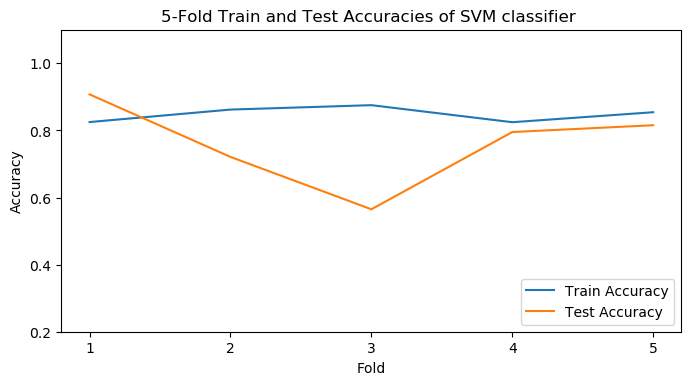

In [214]:
# plot graph for cross validation accuracies
kfold_graph(tr_accuracy_3,ts_accuracy_3,"SVM")

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


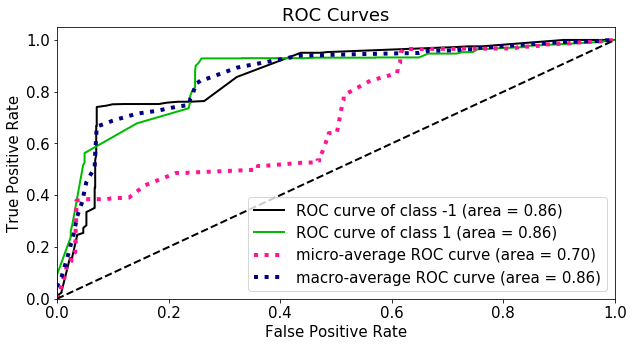

In [216]:
import scikitplot.plotters as skplt
plt.rcParams["font.size"] = "15"
plt.rcParams["figure.figsize"] = (10,5)
skplt.plot_roc_curve(Y_test, model_3.predict_proba(X_test))
plt.show()

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_precision_recall_curve instead.
  warnings.warn(msg, category=FutureWarning)


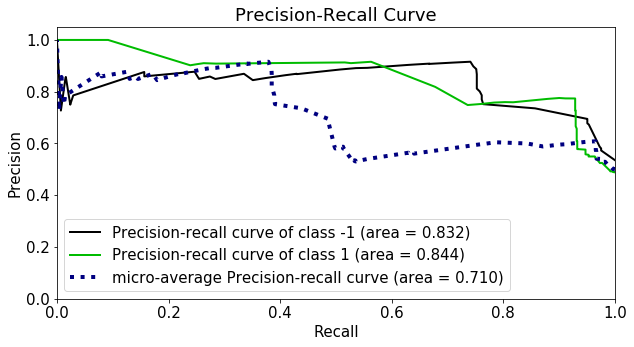

In [217]:
# precision recall curve
skplt.plot_precision_recall_curve(Y_test, model_3.predict_proba(X_test))
plt.show()

##### 1.4 - Naive Bayes

In [218]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
nb = GaussianNB()
model_4=nb.fit(X_train,Y_train)

nb_predict=model_4.predict(X_test)
accuracy_score(nb_predict,Y_test)

0.7942107643600181

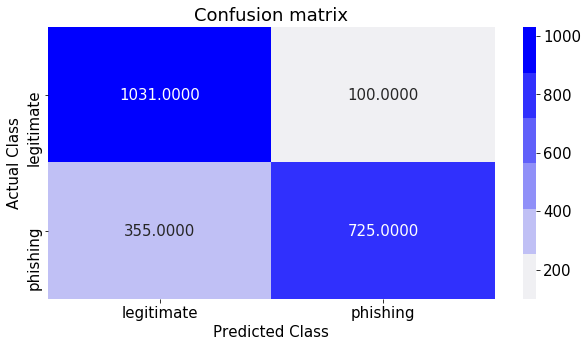

In [219]:
#Confusion matrix
conf_matrix(nb_predict)

In [220]:
#kfold cross validation accuracies
tr_accuracy_4, ts_accuracy_4 = kfold_cross_validation(model_4)
#get the mean value of test accuracy
mean_accuracy_4 = mean(ts_accuracy_4)

mean test accuracy : 0.7528538713262155
max test accuracy : 0.8833107191316146

1 -- Train accuracy: 0.7905688114893136 -- Test accuracy: 0.8833107191316146
2 -- Train accuracy: 0.7905688114893136 -- Test accuracy: 0.7756671189507011
3 -- Train accuracy: 0.8017641072034377 -- Test accuracy: 0.7937584803256446
4 -- Train accuracy: 0.5700554110595951 -- Test accuracy: 0.5119855269109
5 -- Train accuracy: 0.7845997286295794 -- Test accuracy: 0.7995475113122172


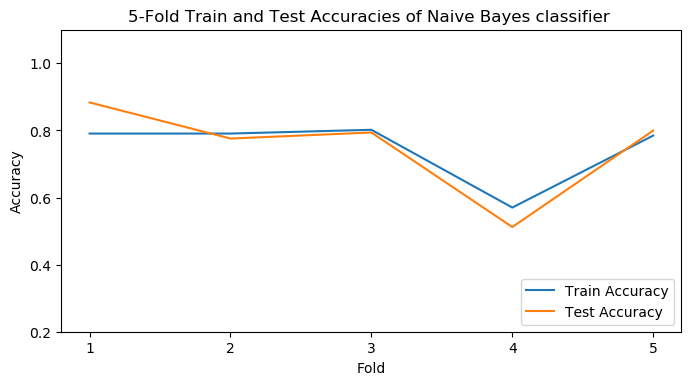

In [221]:
# plot graph for cross validation accuracies
kfold_graph(tr_accuracy_4,ts_accuracy_4,"Naive Bayes")

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


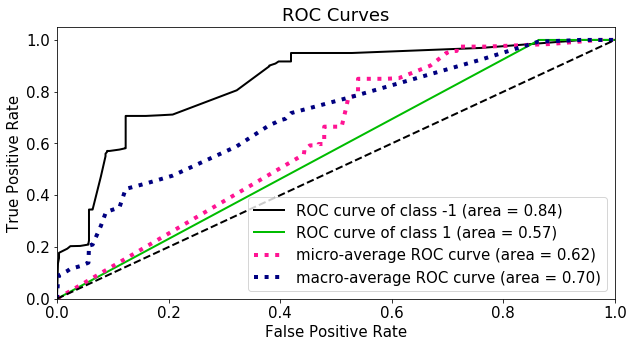

In [222]:
# ROC curve
import scikitplot.plotters as skplt
plt.rcParams["font.size"] = "15"
plt.rcParams["figure.figsize"] = (10,5)
skplt.plot_roc_curve(Y_test, model_4.predict_proba(X_test))
plt.show()

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_precision_recall_curve instead.
  warnings.warn(msg, category=FutureWarning)


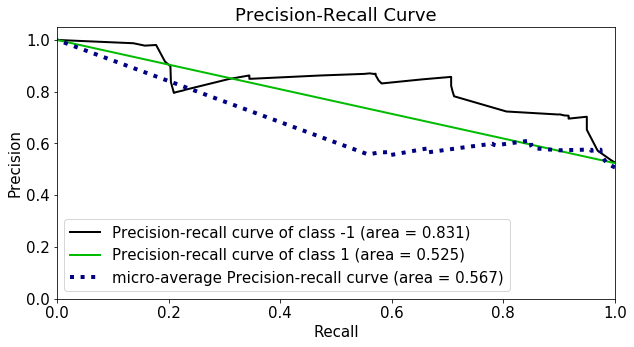

In [223]:
# precision recall curve
skplt.plot_precision_recall_curve(Y_test, model_4.predict_proba(X_test))
plt.show()

##### 1.5 - Logistic Regression

In [224]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
model_5=logreg.fit(X_train,Y_train)

lr_predict=model_5.predict(X_test)
accuracy_score(lr_predict,Y_test)

0.8444142921754862

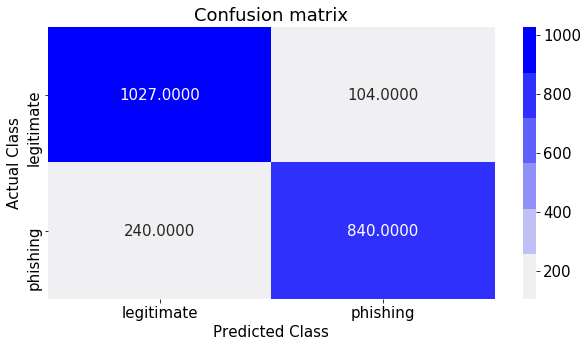

In [225]:
#Confusion matrix
conf_matrix(lr_predict)

In [226]:
#kfold cross validation accuracies
tr_accuracy_5, ts_accuracy_5 = kfold_cross_validation(model_5)
#get the mean value of test accuracy
mean_accuracy_5 = mean(ts_accuracy_5)

mean test accuracy : 0.7698610608004813
max test accuracy : 0.9050203527815468

1 -- Train accuracy: 0.8237023634513174 -- Test accuracy: 0.9050203527815468
2 -- Train accuracy: 0.8638471107090354 -- Test accuracy: 0.7706919945725916
3 -- Train accuracy: 0.8736854008820536 -- Test accuracy: 0.5649027589326097
4 -- Train accuracy: 0.8242677824267782 -- Test accuracy: 0.7946630483943917
5 -- Train accuracy: 0.8530076888285844 -- Test accuracy: 0.814027149321267


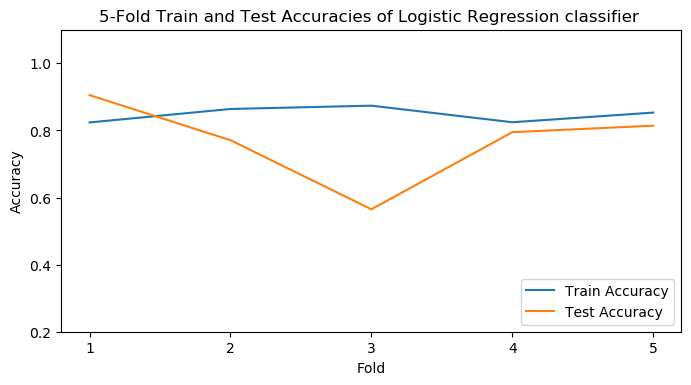

In [227]:
# plot graph for cross validation accuracies
kfold_graph(tr_accuracy_5,ts_accuracy_5,"Logistic Regression")

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


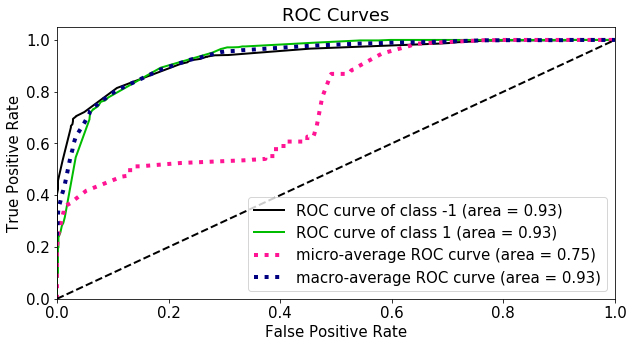

In [228]:
# ROC curve
import scikitplot.plotters as skplt
plt.rcParams["font.size"] = "15"
plt.rcParams["figure.figsize"] = (10,5)
skplt.plot_roc_curve(Y_test, model_5.predict_proba(X_test))
plt.show()

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_precision_recall_curve instead.
  warnings.warn(msg, category=FutureWarning)


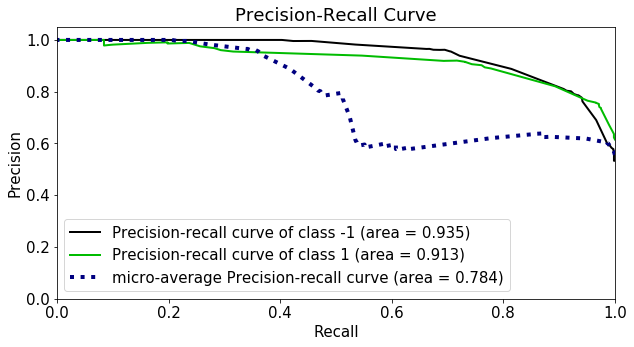

In [229]:
# precision recall curve
skplt.plot_precision_recall_curve(Y_test, model_5.predict_proba(X_test))
plt.show()

Different classifiers gives different accuracies. Lets find the classifier which gives the highest accuracy. 
We will consider the mean accuracy given by 5 fold cross validation process.

In [262]:
clf_accuracy = [mean_accuracy_1,mean_accuracy_2,mean_accuracy_3,mean_accuracy_4,mean_accuracy_5]
clf_accuracy =  [element * 100 for element in clf_accuracy]  #convert to percentage
clf_accuracy = np.around(clf_accuracy,3) # round to three decimal places
clf_accuracy

array([77.077, 77.077, 76.073, 75.285, 76.986])

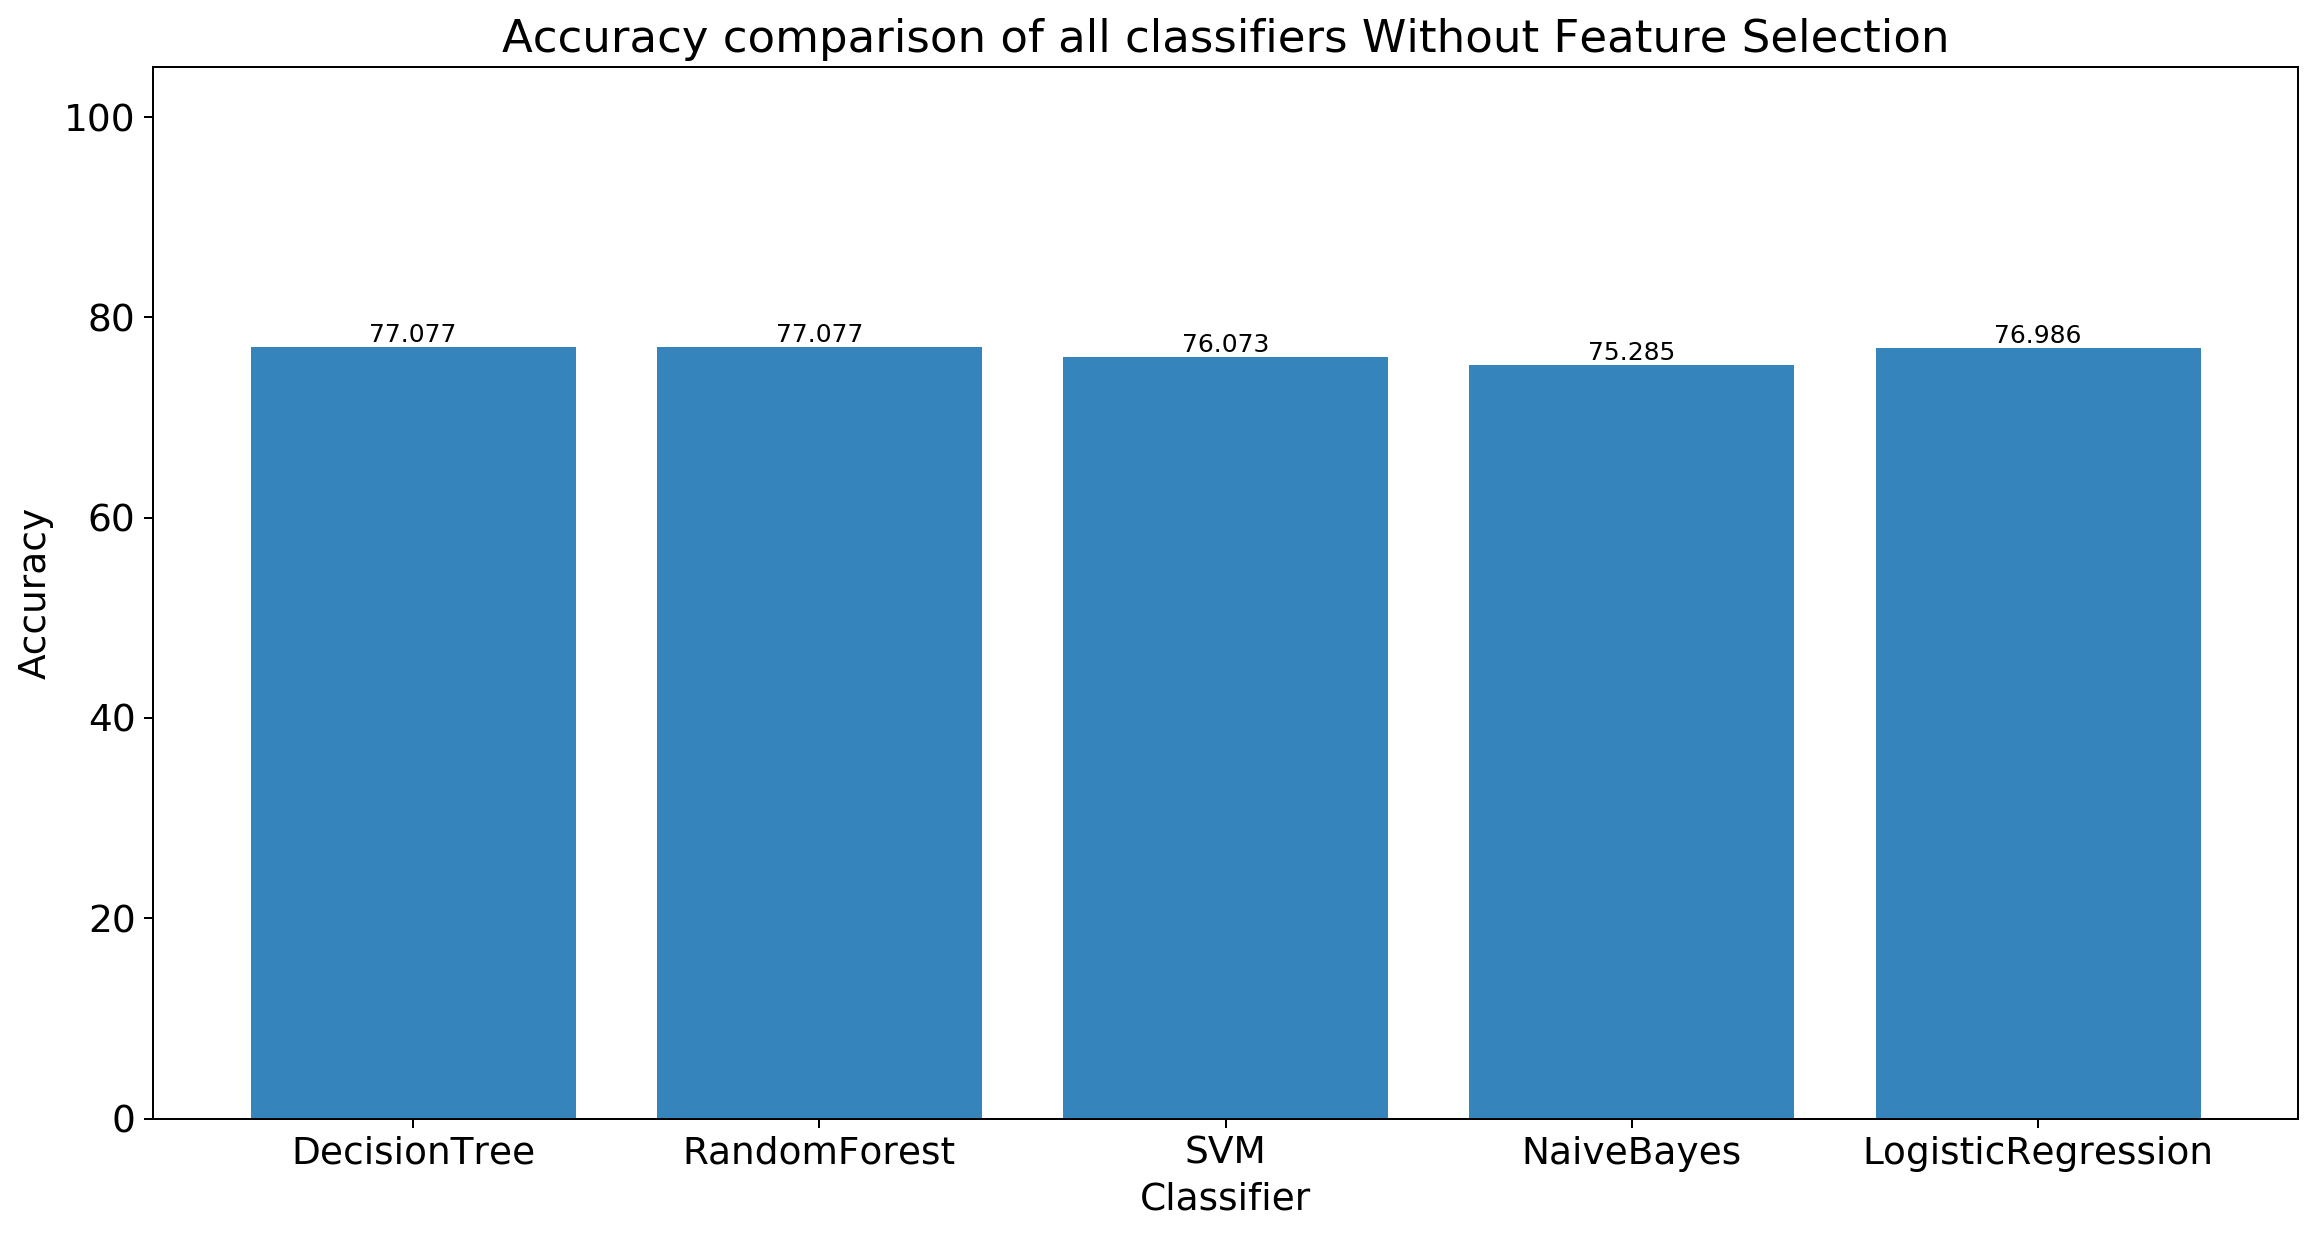

In [265]:
classifiers = ['DecisionTree', 'RandomForest', 'SVM', 'NaiveBayes', 'LogisticRegression']

fig = figure(num=None, figsize=(13, 7), dpi=180, facecolor='w', edgecolor='k')
    
objects = (classifiers)
y_pos = np.arange(len(objects))
accuracy = clf_accuracy
plt.ylim(0, 105)
plt.bar(y_pos, accuracy, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of all classifiers Without Feature Selection')
for a,b in zip(y_pos, accuracy):
    plt.text(a, b, str(b),size = 10, ha='center', va='bottom', rotation=0)

plt.tight_layout(pad=0.8, w_pad=0.9, h_pad=2.0)
plt.show()

In [ ]:
2 - Lets carry out classification for all the features

In [ ]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X= dataset.drop(columns='Result')
Y = dataset['Result']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # this is for the cross validation

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape


In [ ]:
##### 1.5 - Logistic Regression



from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
model_5=logreg.fit(X_train,Y_train)

lr_predict=model_5.predict(X_test)
accuracy_score(lr_predict,Y_test)


#Confusion matrix
conf_matrix(lr_predict)


#kfold cross validation accuracies
tr_accuracy_5, ts_accuracy_5 = kfold_cross_validation(model_5)
#get the mean value of test accuracy
mean_accuracy_5 = mean(ts_accuracy_5)


# plot graph for cross validation accuracies
kfold_graph(tr_accuracy_5,ts_accuracy_5,"Logistic Regression")

# ROC curve
import scikitplot.plotters as skplt
plt.rcParams["font.size"] = "15"
plt.rcParams["figure.figsize"] = (10,5)
skplt.plot_roc_curve(Y_test, model_5.predict_proba(X_test))
plt.show()

# precision recall curve
skplt.plot_precision_recall_curve(Y_test, model_5.predict_proba(X_test))
plt.show()